In [135]:
mont <- read.csv2('/home/mr1142/Documents/Data/segmentation_data/resultados_validacion/montgomery_dataset_completo.csv')
nih <- read.csv2('/home/mr1142/Documents/Data/segmentation_data/resultados_validacion/NIH_completo.csv')
js <- read.csv2('/home/mr1142/Documents/Data/segmentation_data/resultados_validacion/jsrt_dataset_completo.csv')

In [136]:
mont$normal <- 0
mont$normal[mont$findings == 'normal'] <- 1
nih$normal <- 0
nih$normal[nih$Finding.Labels == 'No Finding'] <- 1
js$normal <- 0
js$normal[js$diagnosis == ''] <- 1

In [137]:
colnames(nih)[which(colnames(nih) == 'Patient.Age')] <- 'age'

In [138]:
total <- rbind(mont[,c('age', 'normal')], nih[,c('age', 'normal')], js[,c('age', 'normal')])

### Relacion edad vs patologia

In [160]:
df = get('total')

Warning message in hist(as.numeric(df$age)):
“NAs introduced by coercion”


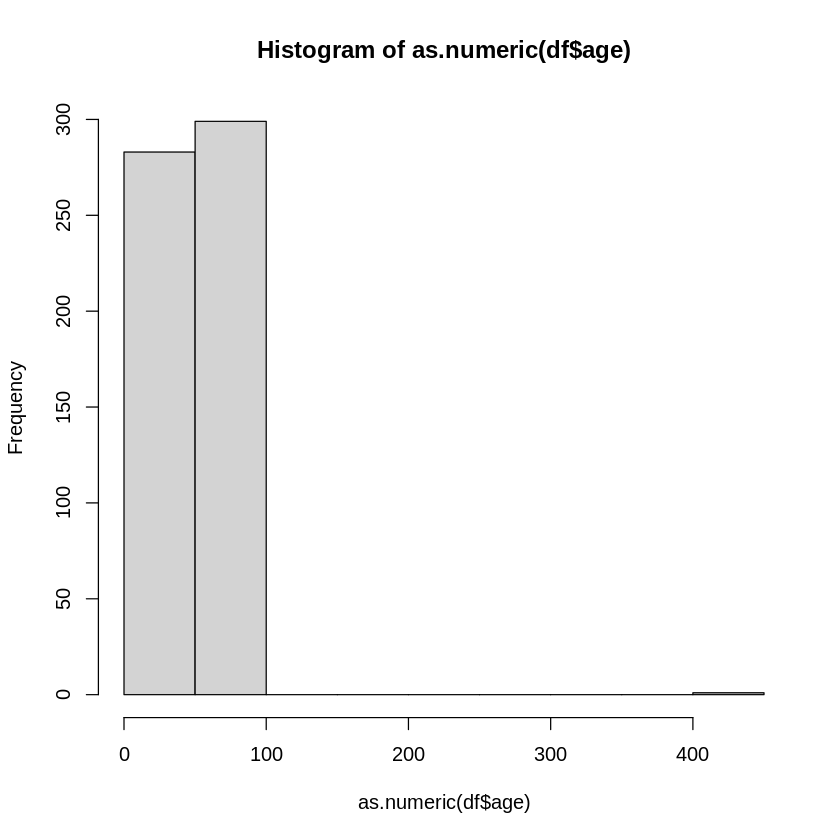

In [161]:
hist(as.numeric(df$age))

In [162]:
library(nortest)
lillie.test(as.numeric(df$age))

Warning message in sort(x[complete.cases(x)]):
“NAs introduced by coercion”



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  as.numeric(df$age)
D = 0.087162, p-value = 2.189e-11


In [163]:
shapiro.test(as.numeric(df$age))

Warning message in stopifnot(is.numeric(x)):
“NAs introduced by coercion”



	Shapiro-Wilk normality test

data:  as.numeric(df$age)
W = 0.70854, p-value < 2.2e-16


In [164]:
print(median(as.numeric(df$age[which(df$normal == 1)]), na.rm = T))
print(median(as.numeric(df$age[which(df$normal == 0)]), na.rm = T))
wilcox.test(as.numeric(df$age) ~ df$normal)

[1] 46


Warning message in median(as.numeric(df$age[which(df$normal == 0)]), na.rm = T):
“NAs introduced by coercion”


[1] 54


Warning message in eval(predvars, data, env):
“NAs introduced by coercion”



	Wilcoxon rank sum test with continuity correction

data:  as.numeric(df$age) by df$normal
W = 54300, p-value = 5.351e-09
alternative hypothesis: true location shift is not equal to 0
